In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def conduccion_1d(K, S, L, Ta, Tb, N):

    """
    Parámetros físicos del problema
    L: float
    L es la longitud del dominio

    K = float
    K es la conductividad
    
    S = float
    S es la fuente

    Ta = FLOAT
    Es la condición de frontera a la izquierda
    
    Tb =  float
    Es la condición de frontera 

 Parámetros numéricos del problema
   N: int
   Es el número de nodos internos (grados de libertad)"""

    h = L/(N+1)

    T = np.zeros(N+2)
    b = np.zeros(N)
    A = np.zeros((N,N))

    r = K/h**2
    b[3] = S/r
    T[0] = Ta
    T[-1] = Tb

    b[0] += Ta
    b[-1] += Tb

#b

    A[0,0] = 2
    A[0,1] = -1

    for i in range(1, N-1):
        A[i,i] = 2
        A[i, i+1] = -1
        A[i, i-1] = -1

    A[-1,-2] = -1
    A[-1,-1] = 2

#A

    T[1:N+1] = np.linalg.solve(A,b)  #regresa un vector de tamaño 4

#T En una diemsión

    plt.plot(T, 'o-')  #Es lineal si no hay fuente
    plt.show

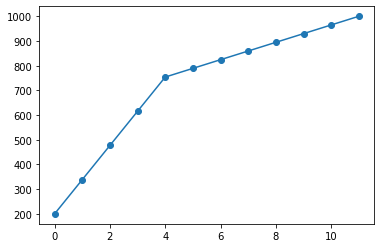

In [16]:
conduccion_1d(0.02, 10.0, 5.0, 200, 1000, 10)

In [17]:
import ipywidgets as widgets

In [18]:
w = widgets.interactive(conduccion_1d,
                       K = widgets.fixed(0.02),
                       S = widgets.FloatSlider(max=200.0, min=-15.0, value=0, step=0.2),
                       L = widgets.fixed(5.0),
                       Ta = widgets.fixed(200),
                       Tb = widgets.fixed(1000),
                       N = widgets.IntSlider(max=100, min=4, value=4))

In [19]:
display(w)

interactive(children=(FloatSlider(value=0.0, description='S', max=200.0, min=-15.0, step=0.2), IntSlider(value…